<a href="https://colab.research.google.com/github/Alexiserges/Feature-Selection/blob/main/CovClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
###Let import all the library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import plotly.express as px
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime

In [8]:
df = pd.read_csv('CovidClusterData01.csv')

In [9]:
df.head()

,cluster,state,district,date_announced,date_last_onset,category,status,cases_new,cases_total,cases_active,tests,icu,deaths,recovered,summary_bm,summary_en
0,KLUSTER WARGA JEPUN,W.P. Kuala Lumpur,LEMBAH PANTAI,3/1/2020,3/9/2020,import,ended,0,3,0,267,0,0,3,NaN,NaN
1,KLUSTER KAMPUNG BARU,W.P. Kuala Lumpur,TITIWANGSA,5/1/2020,15/3/2020,community,ended,0,24,0,5188,0,1,23,NaN,NaN
2,KLUSTER BENTENG LD,Sabah,"LAHAD DATU, TAWAU, SANDAKAN, KINABATANGAN & TU...",9/1/2020,15/11/2020,import,ended,0,1146,0,16592,0,1,1145,NaN,NaN
3,KLUSTER JALAN MERU,"Johor,Kelantan,Pahang,Perak,Selangor","HULU LANGAT, KLANG, GOMBAK, PETALING, HULU SEL...",10/1/2020,11/2/2020,community,ended,0,143,0,1139,0,0,143,NaN,NaN
4,KLUSTER JOO HWA,Sabah,TAWAU,10/1/2020,10/3/2020,community,ended,0,7,0,379,0,0,7,NaN,NaN


In [10]:
df.shape

(7168, 16)

In [11]:
df.isnull().sum()

cluster               0
state                 0
district             13
date_announced        0
date_last_onset       0
category              0
status                0
cases_new             0
cases_total           0
cases_active          0
tests                 0
icu                   0
deaths                0
recovered             0
summary_bm         5611
summary_en         5611
dtype: int64

In [12]:

### Fill missing value ###
df[['district']]=df[['district']].fillna('_')
df[['summary_bm']]=df[['summary_bm']].fillna('_')
df[['summary_en']]=df[['summary_en']].fillna('_')
df.fillna(0, inplace=True)
print(df.isna().sum().sum())

0


In [13]:
df.isnull().sum()

cluster            0
state              0
district           0
date_announced     0
date_last_onset    0
category           0
status             0
cases_new          0
cases_total        0
cases_active       0
tests              0
icu                0
deaths             0
recovered          0
summary_bm         0
summary_en         0
dtype: int64

In [14]:
df.describe()

,cases_new,cases_total,cases_active,tests,icu,deaths,recovered
count,7168.0,7168.000000,7168.000000,7168.000000,7168.000000,7168.000000,7168.000000
mean,0.0,78.338170,0.417132,318.243164,0.001674,0.272182,77.617746
std,0.0,199.235504,5.555519,1086.093459,0.040884,1.287259,198.938481
min,0.0,2.000000,0.000000,3.000000,0.000000,0.000000,0.000000
25%,0.0,18.000000,0.000000,51.000000,0.000000,0.000000,18.000000
50%,0.0,35.000000,0.000000,116.500000,0.000000,0.000000,35.000000
75%,0.0,73.000000,0.000000,282.000000,0.000000,0.000000,73.000000
max,0.0,7205.000000,197.000000,42100.000000,1.000000,37.000000,7204.000000


In [15]:
#Top 13 clusters with  recovered per state
top_13_cases_total = df.sort_values(by='cases_total', ascending=False).head(13)

fig = px.bar(top_13_cases_total.sort_values(by='cases_total', ascending=True),
             x="cases_total", y="state",
             title='Cluster cases per state', text='cases_total',
             template='plotly_dark', orientation='h')

fig.update_traces(marker_color='#2ecc71', textposition='outside')

In [16]:
#Top 13 clusters with  cases_active per state
top_13_cases_active= df.sort_values(by='cases_active', ascending=False).head(13)

fig = px.bar(top_13_cases_total.sort_values(by='cases_active', ascending=True),
             x="cases_active", y="state",
             title='Cluster cases per state', text='cases_active',
             template='plotly_dark', orientation='h')

fig.update_traces(marker_color='#2ecc71', textposition='outside')

In [17]:
#Top 13 clusters with  tests per state
top_13_tests= df.sort_values(by='tests', ascending=False).head(13)

fig = px.bar(top_13_tests.sort_values(by='tests', ascending=True),
             x="tests", y="state",
             title='Cluster cases per state', text='tests',
             template='plotly_dark', orientation='h')

fig.update_traces(marker_color='#2ecc71', textposition='outside')

In [18]:
#Top 13 clusters with  icu per state
top_13_icu= df.sort_values(by='icu', ascending=False).head(13)

fig = px.bar(top_13_icu.sort_values(by='icu', ascending=True),
             x="icu", y="state",
             title='Cluster cases per state', text='icu',
             template='plotly_dark', orientation='h')

fig.update_traces(marker_color='#2ecc71', textposition='outside')

In [19]:
#Top 13 clusters with  deaths per state
top_13_deaths= df.sort_values(by='deaths', ascending=False).head(13)

fig = px.bar(top_13_icu.sort_values(by='deaths', ascending=True),
             x="deaths", y="state",
             title='Cluster cases per state', text='deaths',
             template='plotly_dark', orientation='h')

fig.update_traces(marker_color='#2ecc71', textposition='outside')

In [20]:
#Top 13 clusters with  recovered per state
top_13_recovered= df.sort_values(by='recovered', ascending=False).head(13)

fig = px.bar(top_13_icu.sort_values(by='deaths', ascending=True),
             x="deaths", y="state",
             title='Cluster cases per state', text='deaths',
             template='plotly_dark', orientation='h')

fig.update_traces(marker_color='#2ecc71', textposition='outside')

In [21]:
pip install pycountry


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 59.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=9f6fcc5d8e8a75c2a9300b0b8088a0676d69fe0b5e46202e325841ed62a90f15
  Stored in directory: /root/.cache/pip/wheels/e2/aa/0f/c224e473b464387170b83ca7c66947b4a7e33e8d903a679748
Successfully built pycountry


In [22]:
import pycountry


In [23]:
list_state = df['state'].unique().tolist()
print(list_state) # Uncomment to see list of countries

['W.P. Kuala Lumpur', 'Sabah', 'Johor,Kelantan,Pahang,Perak,Selangor', 'Kedah', 'Johor,Negeri Sembilan,Selangor,W.P. Putrajaya', 'Pulau Pinang', 'Johor,Perak,Selangor,W.P. Kuala Lumpur', 'Pahang', 'Melaka,Negeri Sembilan', 'Selangor,W.P. Kuala Lumpur', 'Selangor', 'Selangor,W.P. Kuala Lumpur,W.P. Putrajaya', 'W.P. Putrajaya', 'W.P. Labuan', ' Johor,Negeri Sembilan,Selangor,W.P. Kuala Lumpur,W.P. Putrajaya', 'Johor', 'Kedah,Pulau Pinang', 'Kedah,Pulau Pinang,Perak,Perlis', 'Kelantan,Negeri Sembilan,Selangor', 'Malaysia', ' Negeri Sembilan, Selangor,W.P. Kuala Lumpur,W.P. Putrajaya', 'Negeri Sembilan, Pahang, W.P. Kuala Lumpur', 'Sarawak', ' Negeri Sembilan,Selangor', 'Johor,Perak,Selangor', 'Johor,Melaka', 'Kelantan', ' Negeri Sembilan,Perak,Selangor,W.P. Kuala Lumpur,W.P. Putrajaya', ' Pahang,W.P. Kuala Lumpur', ' Kelantan,Pahang', 'Negeri Sembilan', ' Melaka,Negeri Sembilan,Selangor,Sarawak,W.P. Putrajaya', 'Johor, Selangor', 'Terengganu', 'Kedah,Negeri Sembilan,Selangor', 'Selangor,W

In [24]:
d_state_code = {}  # To hold the state names and their ISO

In [25]:
for state in list_state:
    try:
        state_data = pycountry.countries.search_fuzzy(state)
        # country_data is a list of objects of class pycountry.db.Country
        # The first item  ie at index 0 of list is best fit
        # object of class Country have an alpha_3 attribute
        country_code = state_data[0].alpha_3
        d_state_code.update({state: country_code})
    except:
        print('could not add ISO 3 code for ->', state)
        # If could not find country, make ISO code ' '
        d_state_code.update({state: ' '})
 
 

could not add ISO 3 code for -> W.P. Kuala Lumpur
could not add ISO 3 code for -> Johor,Kelantan,Pahang,Perak,Selangor
could not add ISO 3 code for -> Johor,Negeri Sembilan,Selangor,W.P. Putrajaya
could not add ISO 3 code for -> Johor,Perak,Selangor,W.P. Kuala Lumpur
could not add ISO 3 code for -> Melaka,Negeri Sembilan
could not add ISO 3 code for -> Selangor,W.P. Kuala Lumpur
could not add ISO 3 code for -> Selangor,W.P. Kuala Lumpur,W.P. Putrajaya
could not add ISO 3 code for -> W.P. Putrajaya
could not add ISO 3 code for -> W.P. Labuan
could not add ISO 3 code for ->  Johor,Negeri Sembilan,Selangor,W.P. Kuala Lumpur,W.P. Putrajaya
could not add ISO 3 code for -> Kedah,Pulau Pinang
could not add ISO 3 code for -> Kedah,Pulau Pinang,Perak,Perlis
could not add ISO 3 code for -> Kelantan,Negeri Sembilan,Selangor
could not add ISO 3 code for ->  Negeri Sembilan, Selangor,W.P. Kuala Lumpur,W.P. Putrajaya
could not add ISO 3 code for -> Negeri Sembilan, Pahang, W.P. Kuala Lumpur
could no

In [26]:
 print(d_state_code) # Uncomment to check dictionary  

{'W.P. Kuala Lumpur': ' ', 'Sabah': 'MYS', 'Johor,Kelantan,Pahang,Perak,Selangor': ' ', 'Kedah': 'MYS', 'Johor,Negeri Sembilan,Selangor,W.P. Putrajaya': ' ', 'Pulau Pinang': 'MYS', 'Johor,Perak,Selangor,W.P. Kuala Lumpur': ' ', 'Pahang': 'MYS', 'Melaka,Negeri Sembilan': ' ', 'Selangor,W.P. Kuala Lumpur': ' ', 'Selangor': 'MYS', 'Selangor,W.P. Kuala Lumpur,W.P. Putrajaya': ' ', 'W.P. Putrajaya': ' ', 'W.P. Labuan': ' ', ' Johor,Negeri Sembilan,Selangor,W.P. Kuala Lumpur,W.P. Putrajaya': ' ', 'Johor': 'MYS', 'Kedah,Pulau Pinang': ' ', 'Kedah,Pulau Pinang,Perak,Perlis': ' ', 'Kelantan,Negeri Sembilan,Selangor': ' ', 'Malaysia': 'MYS', ' Negeri Sembilan, Selangor,W.P. Kuala Lumpur,W.P. Putrajaya': ' ', 'Negeri Sembilan, Pahang, W.P. Kuala Lumpur': ' ', 'Sarawak': 'MYS', ' Negeri Sembilan,Selangor': ' ', 'Johor,Perak,Selangor': ' ', 'Johor,Melaka': ' ', 'Kelantan': 'MYS', ' Negeri Sembilan,Perak,Selangor,W.P. Kuala Lumpur,W.P. Putrajaya': ' ', ' Pahang,W.P. Kuala Lumpur': ' ', ' Kelantan,Pa

In [27]:
# create a new column iso_alpha in the df
# and fill it with appropriate iso 3 code
for k, v in d_state_code.items():
    df.loc[(df.state == k), 'iso_alpha'] = v

In [28]:
print(df.head)  # Uncomment to confirm that ISO codes added

<bound method NDFrame.head of                                    cluster  \
0                      KLUSTER WARGA JEPUN   
1                     KLUSTER KAMPUNG BARU   
2                       KLUSTER BENTENG LD   
3                       KLUSTER JALAN MERU   
4                          KLUSTER JOO HWA   
...                                    ...   
7163  KLUSTER DUA JALAN DATO AHMAD YUNUS 2   
7164                   KLUSTER JALAN YEW 4   
7165            KLUSTER BATU 4 KUALA RUI 3   
7166           KLUSTER REGAT DAMAI TAIPING   
7167               KLUSTER JALAN TEMIANG 2   

                                     state  \
0                        W.P. Kuala Lumpur   
1                        W.P. Kuala Lumpur   
2                                    Sabah   
3     Johor,Kelantan,Pahang,Perak,Selangor   
4                                    Sabah   
...                                    ...   
7163                                 Perak   
7164                     W.P. Kuala Lumpur   
716

In [29]:
fig = px.choropleth(data_frame = df,
                    locations= "iso_alpha",
                    color= "deaths",  # value in column ' deaths ' determines color
                    hover_name= "state",
                    color_continuous_scale= 'RdYlGn',  #  color scale red, yellow green
                    animation_frame= "date_last_onset")
 
fig.show()

In [30]:
# create new dataframe by selecting cell/row started from 2020
df1 = df[df['date_last_onset'].str.contains("2020")]


In [31]:
df1.head()

,cluster,state,district,date_announced,date_last_onset,category,status,cases_new,cases_total,cases_active,tests,icu,deaths,recovered,summary_bm,summary_en,iso_alpha
0,KLUSTER WARGA JEPUN,W.P. Kuala Lumpur,LEMBAH PANTAI,3/1/2020,3/9/2020,import,ended,0,3,0,267,0,0,3,_,_,
1,KLUSTER KAMPUNG BARU,W.P. Kuala Lumpur,TITIWANGSA,5/1/2020,15/3/2020,community,ended,0,24,0,5188,0,1,23,_,_,
2,KLUSTER BENTENG LD,Sabah,"LAHAD DATU, TAWAU, SANDAKAN, KINABATANGAN & TU...",9/1/2020,15/11/2020,import,ended,0,1146,0,16592,0,1,1145,_,_,MYS
3,KLUSTER JALAN MERU,"Johor,Kelantan,Pahang,Perak,Selangor","HULU LANGAT, KLANG, GOMBAK, PETALING, HULU SEL...",10/1/2020,11/2/2020,community,ended,0,143,0,1139,0,0,143,_,_,
4,KLUSTER JOO HWA,Sabah,TAWAU,10/1/2020,10/3/2020,community,ended,0,7,0,379,0,0,7,_,_,MYS


In [32]:
df1 = df1.set_index('date_last_onset')

In [33]:
df1[['cases_total']]
             
 #df1_cases_new.tail(10)

,cases_total
date_last_onset,
3/9/2020,3
15/3/2020,24
15/11/2020,1146
11/2/2020,143
10/3/2020,7
...,...
28/12/2020,12
31/12/2020,13
29/12/2020,9


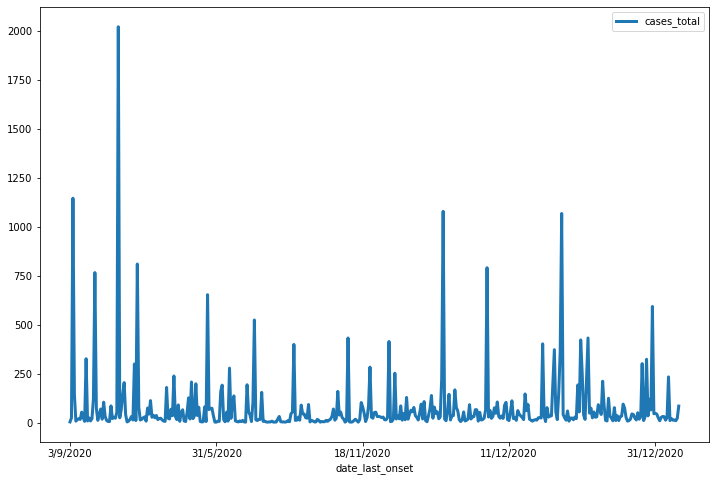

In [34]:
case =df1[['cases_total']]
case.plot(figsize=(12,8), linewidth=3, legend=True)

plt.show()

In [35]:
df1[['cases_new','deaths','recovered']]


,cases_new,deaths,recovered
date_last_onset,,,
3/9/2020,0,0,3
15/3/2020,0,1,23
15/11/2020,0,1,1145
11/2/2020,0,0,143
10/3/2020,0,0,7
...,...,...,...
28/12/2020,0,0,12
31/12/2020,0,0,13
29/12/2020,0,0,9


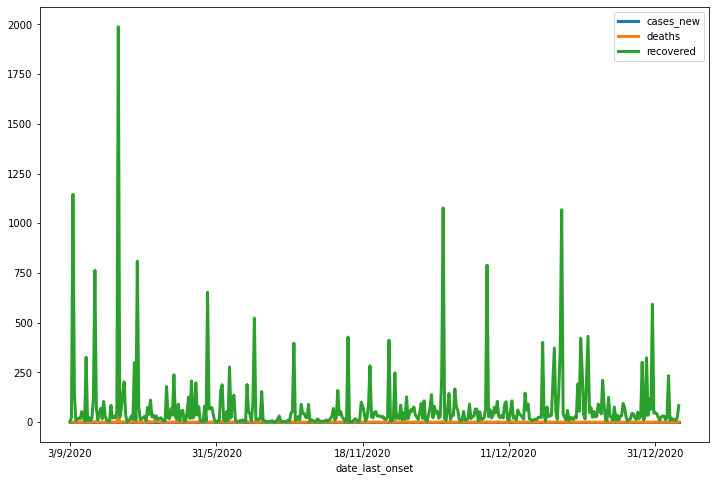

In [36]:
case = df1[['cases_new','deaths','recovered']]
case.plot(figsize=(12,8), linewidth=3, legend=True)

plt.show()

In [37]:
# create new dataframe by selecting cell/row started from 2020
df2 = df[df['date_last_onset'].str.contains("2021")]

In [38]:
df2.head()

,cluster,state,district,date_announced,date_last_onset,category,status,cases_new,cases_total,cases_active,tests,icu,deaths,recovered,summary_bm,summary_en,iso_alpha
8,KLUSTER USAHA,"Johor,Perak,Selangor,W.P. Kuala Lumpur","KLANG, PETALING, KUALA LANGAT, LEMBAH PANTAI,...",11/1/2020,2/3/2021,workplace,ended,0,589,0,879,0,0,589,_,_,
30,KLUSTER CERGAS,"Kelantan,Negeri Sembilan,Selangor","KLANG, SEREMBAN, REMBAU. PORT DICKSON, JEMPOL,...",11/3/2020,14/1/2021,workplace,ended,0,1738,0,6048,0,1,1737,_,_,
35,KLUSTER HUJUNG PASIR,W.P. Labuan,LABUAN,12/3/2020,29/1/2021,workplace,ended,0,85,0,893,0,0,85,_,_,
57,KLUSTER TAPAK BINA MUDA,"Negeri Sembilan,Perak,Selangor,W.P. Kuala Lum...","KEPONG, TITIWANGSA, LEMBAH PANTAI, PETALING, S...",12/4/2020,3/5/2021,workplace,ended,0,2323,0,5806,0,0,2323,_,_,
58,KLUSTER JALAN GENTING,"Pahang,W.P. Kuala Lumpur","TITIWANGSA, LEMBAH PANTAI & BENTONG",12/4/2020,1/12/2021,workplace,ended,0,465,0,1184,0,0,465,_,_,


In [39]:
df2 = df2.set_index('date_last_onset')

In [40]:
df2[['cases_total']]
             
 #df1_cases_new.tail(10)

,cases_total
date_last_onset,
2/3/2021,589
14/1/2021,1738
29/1/2021,85
3/5/2021,2323
1/12/2021,465
...,...
31/12/2021,18
29/12/2021,12
30/12/2021,19


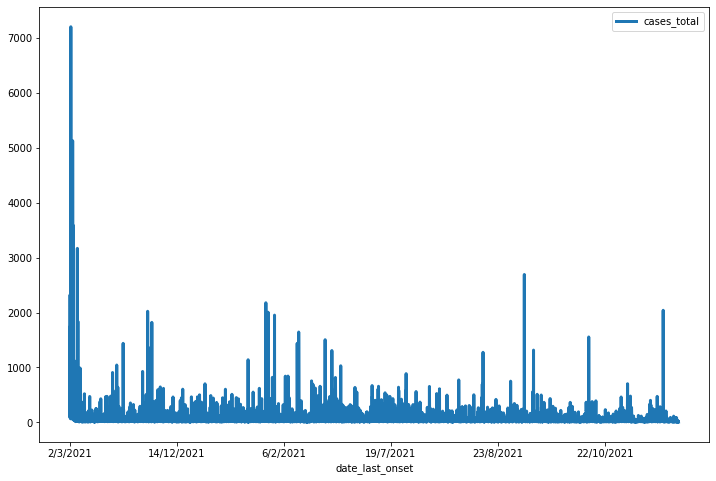

In [41]:
case =df2[['cases_total']]
case.plot(figsize=(12,8), linewidth=3, legend=True)

plt.show()

In [42]:
df2[['cases_new','deaths','recovered']]

,cases_new,deaths,recovered
date_last_onset,,,
2/3/2021,0,0,589
14/1/2021,0,1,1737
29/1/2021,0,0,85
3/5/2021,0,0,2323
1/12/2021,0,0,465
...,...,...,...
31/12/2021,0,0,18
29/12/2021,0,0,12
30/12/2021,0,0,19


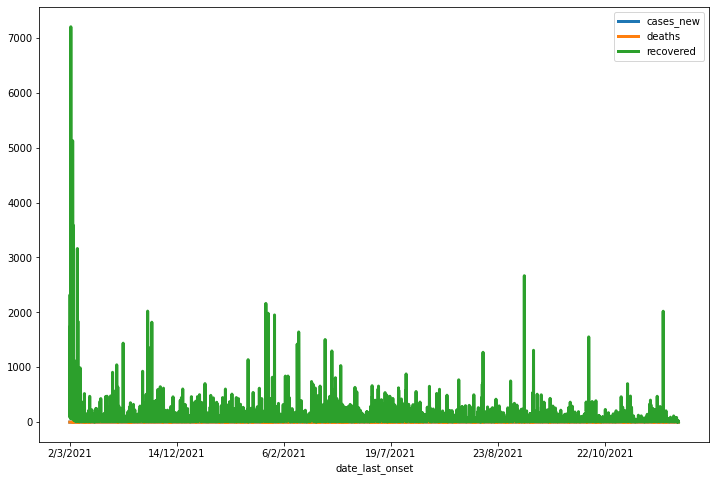

In [43]:
case = df2[['cases_new','deaths','recovered']]
case.plot(figsize=(12,8), linewidth=3, legend=True)

plt.show()

In [44]:
# create new dataframe by selecting cell/row started from 2020
df3 = df[df['date_last_onset'].str.contains("2022")]

In [45]:
df3.head()

,cluster,state,district,date_announced,date_last_onset,category,status,cases_new,cases_total,cases_active,tests,icu,deaths,recovered,summary_bm,summary_en,iso_alpha
692,KLUSTER INDUSTRI DUA JALAN LAPAN OLAK,Selangor,KUALA LANGAT,12/1/2021,1/9/2022,workplace,ended,0,137,0,530,0,0,137,Kluster ini dikenal pasti hasil saringan bersa...,The cluster was identified as a result of targ...,MYS
1047,KLUSTER INDUSTRI JALAN LABOHAN DAGANG-NILAI,Selangor,"HULU LANGAT, KUALA LANGAT, KLANG, SEPANG",9/2/2021,19/1/2022,workplace,ended,0,239,0,693,0,0,239,Kluster ini dikenalpasti hasil saringan bersas...,This cluster identification resulted from targ...,MYS
5547,KLUSTER INDUSTRI BATU BERENDAM 2,Melaka,"ALOR GAJAH, JASIN, MELAKA TENGAH",30/10/2021,2/8/2022,workplace,ended,0,601,0,1312,0,0,601,Kluster ini merupakan kluster berulang kali ke...,This cluster is the second recurring cluster i...,MYS
6036,KLUSTER JALAN PASAR ANSON,Perak,HILIR PERAK,12/12/2021,1/1/2022,highRisk,ended,0,61,0,77,0,0,61,Kluster ini dikenalpasti hasil saringan bersas...,This cluster was identified as a result of tar...,MYS
6055,KLUSTER SENTOSA PARIT LIMA,Selangor,SABAK BERNAM,15/12/2021,1/4/2022,community,ended,0,19,0,24,0,0,19,"Kes indeks bagi kluster merupakan perempuan, b...","The index case for the cluster was a female, 6...",MYS


In [46]:
df3 = df3.set_index('date_last_onset')

In [47]:
df3[['cases_total']]
             
 #df1_cases_new.tail(10)

,cases_total
date_last_onset,
1/9/2022,137
19/1/2022,239
2/8/2022,601
1/1/2022,61
1/4/2022,19
...,...
11/11/2022,48
14/12/2022,8
18/12/2022,15


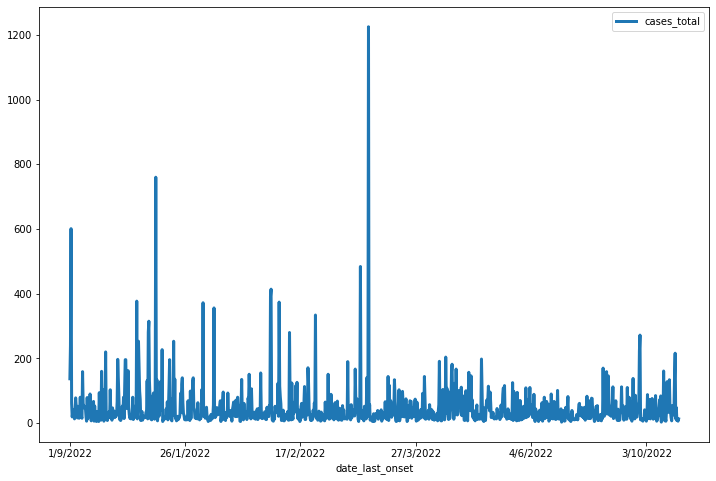

In [48]:
case =df3[['cases_total']]
case.plot(figsize=(12,8), linewidth=3, legend=True)

plt.show()

In [49]:
df3[['cases_new','deaths','recovered']]

,cases_new,deaths,recovered
date_last_onset,,,
1/9/2022,0,0,137
19/1/2022,0,0,239
2/8/2022,0,0,601
1/1/2022,0,0,61
1/4/2022,0,0,19
...,...,...,...
11/11/2022,0,0,0
14/12/2022,0,0,0
18/12/2022,0,1,0


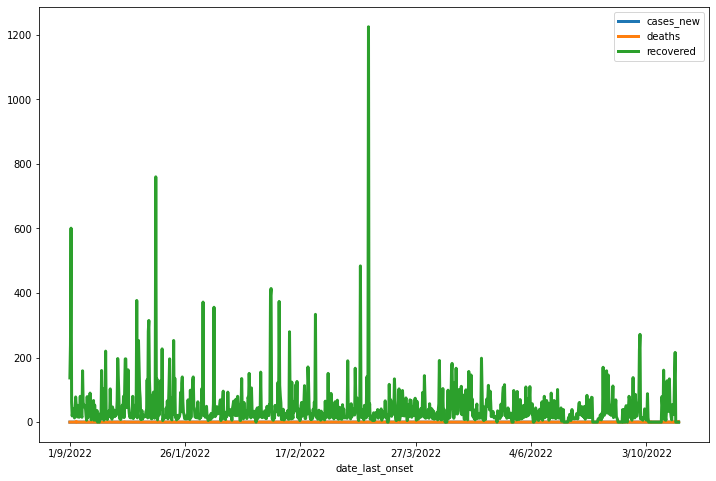

In [50]:
case = df3[['cases_new','deaths','recovered']]
case.plot(figsize=(12,8), linewidth=3, legend=True)

plt.show()

In [51]:
# create new dataframe by selecting cell/row started from 2020
df4 = df[df['date_last_onset'].str.contains("2023")]

In [52]:
df4.head()

,cluster,state,district,date_announced,date_last_onset,category,status,cases_new,cases_total,cases_active,tests,icu,deaths,recovered,summary_bm,summary_en,iso_alpha
7165,KLUSTER BATU 4 KUALA RUI 3,Perak,HULU PERAK,17/1/2023,16/1/2023,education,active,0,11,11,64,0,0,0,Kluster ini melibatkan pelajar-pelajar sebuah ...,This cluster involves students from an educati...,MYS
7166,KLUSTER REGAT DAMAI TAIPING,Perak,"LARUT, MATANG,SELAMA",1/5/2023,1/5/2023,highRisk,active,0,16,16,25,0,0,0,Kluster ini melibatkan penghuni-penghuni sebua...,This cluster involves the residents of a care ...,MYS
7167,KLUSTER JALAN TEMIANG 2,Negeri Sembilan,SEREMBAN,1/6/2023,1/5/2023,highRisk,active,0,4,4,13,0,0,0,Kluster ini merupakan kluster berulang kali ke...,This cluster is the second repeated cluster of...,MYS


In [53]:
#Define X and normalize values
#X = covid_cluster.drop(["cluster","state","district","category","status","date_announced", "date_last_onset","cases_new"], axis=1)

numeric_lst=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_cols = list(df.select_dtypes(include=numeric_lst).columns)

In [54]:
numerical_cols

['cases_new',
 'cases_total',
 'cases_active',
 'tests',
 'icu',
 'deaths',
 'recovered']

In [55]:
df=df[numerical_cols]

In [56]:
df.head()

,cases_new,cases_total,cases_active,tests,icu,deaths,recovered
0,0,3,0,267,0,0,3
1,0,24,0,5188,0,1,23
2,0,1146,0,16592,0,1,1145
3,0,143,0,1139,0,0,143
4,0,7,0,379,0,0,7


In [57]:
### It is always a good practice to split train and test data to avoid
#overfitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop(labels=['recovered'], axis=1),
    df['recovered'],
    test_size=0.3,
    random_state=0)

In [58]:
X_train

,cases_new,cases_total,cases_active,tests,icu,deaths
4279,0,91,0,378,0,0
1606,0,40,0,497,0,0
480,0,133,0,403,0,0
5667,0,50,0,151,0,0
2931,0,152,0,176,0,0
...,...,...,...,...,...,...
4931,0,139,0,220,0,0
3264,0,178,0,270,0,1
1653,0,44,0,53,0,0
2607,0,9,0,15,0,0


In [59]:
X_train.isnull().sum()

cases_new       0
cases_total     0
cases_active    0
tests           0
icu             0
deaths          0
dtype: int64

In [60]:
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
mutual_info = mutual_info_regression(X_train, y_train)
mutual_info

array([0.00440084, 0.40619245, 0.01409992, 0.08307935, 0.01042625,
       0.02378021])

In [61]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

cases_total     0.406192
tests           0.083079
deaths          0.023780
cases_active    0.014100
icu             0.010426
cases_new       0.004401
dtype: float64

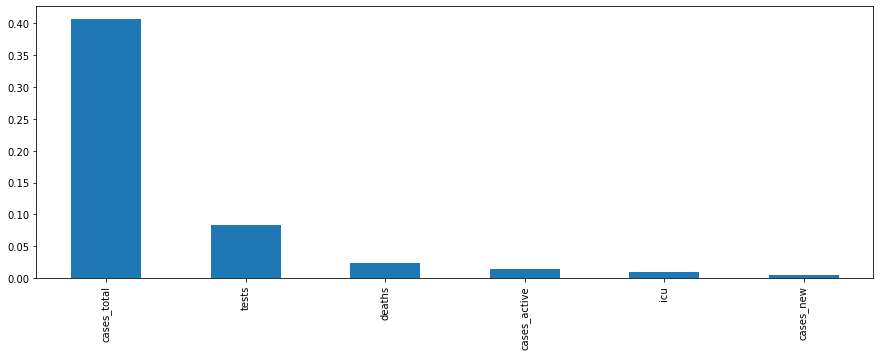

In [62]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [63]:
from sklearn.feature_selection import SelectPercentile

In [64]:
## Selecting the top 20 percentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=20)
selected_top_columns.fit(X_train, y_train)

SelectPercentile(percentile=20,
                 score_func=<function mutual_info_regression at 0x7ff4bb1cb8b0>)

In [65]:
selected_top_columns.get_support()

array([False,  True, False, False, False, False])

In [66]:
X_train.columns[selected_top_columns.get_support()]

Index(['cases_total'], dtype='object')

In [68]:
#Define the dependent variable that needs to be predicted (labels)
y = df["recovered"].values

In [69]:
X= df.drop(["recovered"], axis=1)

In [70]:
X.head()

,cases_new,cases_total,cases_active,tests,icu,deaths
0,0,3,0,267,0,0
1,0,24,0,5188,0,1
2,0,1146,0,16592,0,1
3,0,143,0,1139,0,0
4,0,7,0,379,0,0


In [71]:
feature_names = np.array(X.columns) 

In [72]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [73]:
#Define the dependent variable that needs to be predicted (labels)
y = df["recovered"].values

In [74]:

##Split data into train and test to verify accuracy after fitting the model. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [75]:
# Define XGBOOST classifier to be used by Boruta
import xgboost as xgb
#model = xgb.XGBClassifier()  #For Boruta
from sklearn.ensemble import RandomForestRegressor

Create shadow features – random features and shuffle values in columns Train Random Forest / XGBoost and calculate feature importance via mean decrease impurity Check if real features have higher importance compared to shadow features Repeat this for every iteration If original feature performed better, then mark it as important

In [76]:
pip install Boruta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 KB 2.7 MB/s eta 0:00:00


In [77]:
from boruta import BorutaPy

In [79]:
# let's initialize a RF model
model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)

In [80]:
# define Boruta feature selection method
feat_selector = BorutaPy(model, n_estimators='auto', verbose=2, random_state=1)

In [81]:
from sklearn.ensemble import RandomForestClassifier

# define random forest classifier
forest = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
forest.fit(X, y)

RandomForestClassifier(class_weight='balanced', max_depth=5, n_jobs=-1)

In [82]:
# define Boruta feature selection method
feat_selector = BorutaPy(forest, n_estimators='auto', verbose=2, random_state=1)

In [83]:
# find all relevant features
feat_selector.fit(X_train, y_train)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	6
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	6
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	6
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	6
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	6
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	6
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	6
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	3
Iteration: 	9 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	3
Iteration: 	10 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	3
Iteration: 	11 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	3
Iteration: 	12 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	3
Iteration: 	13 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	3
Iteration: 	14 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	3
Iteration: 	15 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	3
Iteration: 	16 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	3
Iteration: 	17 / 

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced', max_depth=5,
                                          n_estimators=48, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x7FF4B2295E40),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7FF4B2295E40, verbose=2)

In [84]:
# check selected features
print(feat_selector.support_)  #Should we accept the feature

[False  True False  True False False]


In [85]:
# check ranking of features
print(feat_selector.ranking_) #Rank 1 is the best

[5 1 3 1 4 2]


In [86]:
# call transform() on X to filter it down to selected features
X_filtered = feat_selector.transform(X_train)  #Apply feature selection and return transformed data

In [87]:

"""
Review the features
"""
# zip feature names, ranks, and decisions 
feature_ranks = list(zip(feature_names, 
                         feat_selector.ranking_, 
                         feat_selector.support_))

In [88]:
# print the results
for feat in feature_ranks:
    print('Feature: {:<30} Rank: {},  Keep: {}'.format(feat[0], feat[1], feat[2]))

Feature: cases_new                      Rank: 5,  Keep: False
Feature: cases_total                    Rank: 1,  Keep: True
Feature: cases_active                   Rank: 3,  Keep: False
Feature: tests                          Rank: 1,  Keep: True
Feature: icu                            Rank: 4,  Keep: False
Feature: deaths                         Rank: 2,  Keep: False


In [89]:
print("\n------Selected Features------\n")
print(X_filtered)


------Selected Features------

[[-0.05691235 -0.21200683]
 [-0.17738121 -0.12821445]
 [-0.25267425 -0.22858114]
 ...
 [ 0.25429888  0.01174643]
 [-0.3580845  -0.27277932]
 [-0.20247889 -0.2166108 ]]


In [90]:
# features selected by Boruta
X_filtered = feat_selector.transform(np.array(X))

In [91]:
print("\n------Selected Features------\n")
print(X_filtered)


------Selected Features------

[[-0.37816265 -0.04718447]
 [-0.27275239  4.48404925]
 [ 5.35916688 14.98479894]
 ...
 [-0.33800636 -0.23410591]
 [-0.31290868 -0.27001693]
 [-0.37314311 -0.28106647]]


In [92]:
# train the model
model.fit(X_filtered, y)

RandomForestRegressor(max_depth=5, random_state=42)

In [93]:
# compute predictions
predictions = model.predict(X_filtered)

In [94]:
# create a dataframe with real predictions and values
df = pd.DataFrame({'pred': predictions, 'observed': y})

In [95]:
# let's print the dataframe
print("\n------Predictions and real values------\n")
print(df)


------Predictions and real values------

             pred  observed
0       13.057925         3
1       27.287462        23
2     1104.666435      1145
3      137.484254       143
4       13.057925         7
...           ...       ...
7163    13.057925         0
7164    13.057925         0
7165    13.057925         0
7166    13.057925         0
7167    13.057925         0

[7168 rows x 2 columns]


In [96]:
# compute RMSE
mse = ((df['pred'] - df['observed']) ** 2).mean()
rmse = np.sqrt(mse)
print("\n------RMSE for Boruta------\n", round(rmse, 3))


------RMSE for Boruta------
 16.607


In [97]:
# features selected by Boruta
X_train = feat_selector.transform(np.array(X))

In [98]:
# train the model
model.fit(X_train,y)

RandomForestRegressor(max_depth=5, random_state=42)

In [99]:
# compute predictions
predictions = model.predict(X_train)

In [100]:
# create a dataframe with real predictions and values
df = pd.DataFrame({'pred': predictions, 'observed': y})

In [101]:
# let's print the dataframe
print("\n------Predictions and real values------\n")
print(df)


------Predictions and real values------

             pred  observed
0       13.057925         3
1       27.287462        23
2     1104.666435      1145
3      137.484254       143
4       13.057925         7
...           ...       ...
7163    13.057925         0
7164    13.057925         0
7165    13.057925         0
7166    13.057925         0
7167    13.057925         0

[7168 rows x 2 columns]


In [102]:
# compute RMSE
mse = ((df['pred'] - df['observed']) ** 2).mean()
rmse = np.sqrt(mse)
print("\n------RMSE Information Gain\Mutual Information------\n", round(rmse, 3))


------RMSE Information Gain\Mutual Information------
 16.607


In [103]:
##  Applying PCA Algorithms
from sklearn.decomposition import PCA

In [104]:
pca=PCA(n_components=2)

In [105]:
data_pca=pca.fit_transform(X)

In [106]:
data_pca

array([[-3.57684979e-01, -2.89812409e-02],
       [ 2.96069109e+00,  8.32444305e-03],
       [ 1.29280944e+01,  3.03187047e-01],
       ...,
       [-4.84040009e-01,  1.36975973e+00],
       [-5.06399454e-01,  2.00637659e+00],
       [-5.14256112e-01,  4.77244497e-01]])

In [107]:
pca.explained_variance_

array([1.87321382, 1.00364485])

In [108]:
# train the model
model.fit(data_pca, y)

RandomForestRegressor(max_depth=5, random_state=42)

In [109]:
# compute predictions
predictions = model.predict(data_pca)

In [110]:
# create a dataframe with real predictions and values
df = pd.DataFrame({'pred': predictions, 'observed': y})

In [111]:
# let's print the dataframe
print("\n------Predictions and real values------\n")
print(df)


------Predictions and real values------

             pred  observed
0       30.304958         3
1      332.304299        23
2     1357.380678      1145
3      200.516155       143
4       44.896802         7
...           ...       ...
7163     2.498369         0
7164     3.531965         0
7165     2.498369         0
7166     2.498369         0
7167     2.498369         0

[7168 rows x 2 columns]


In [112]:
# compute RMSE
mse = ((df['pred'] - df['observed']) ** 2).mean()
rmse = np.sqrt(mse)
print("\n------RMSE of PCA------\n", round(rmse, 3))


------RMSE of PCA------
 45.084
